In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

#
from scipy import interp
import math
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [4]:
# Read train and test data 

train_data = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\train.csv')
test_data = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\test.csv')
idx = len(train_data)

In [5]:
display(train_data.sample(3))
display(test_data.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.00,NaN,S
221,1113,3,"Reynolds, Mr. Harold J",male,21.0,0,0,342684,8.05,NaN,S
125,1017,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.10,NaN,S


In [6]:
#Merging train and test data

train_data.drop('PassengerId',axis=1, inplace= True)
test_data.drop('PassengerId',axis=1, inplace= True)

merged_data = pd.concat([train_data, test_data], sort= False).reset_index(drop= True)

In [10]:
#checking merged data shape
merged_data.shape

(1309, 11)

In [11]:
#checking features and target columns
merged_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


###  EDA

In [20]:
#selecting categorical categories for visualization

cats = ['Survived','Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

def plotFrequency(cats) :
    # Ploting the count as well as percetage frequency
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize = (20,12))
    axes = axes.flatten()
    
    for ax, cat in zip(axes, cats) :
        if cat == 'Survived' :
            total = float(len(train_data[cat]))
        else :
            total = float(len(merged_data[cat]))
            
        sns.countplot(merged_data[cat], palette = 'plasma', ax =ax)
        
        for p in ax.patches :
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 10,
                   '{:1.2f}%'.format((height/total) * 100), ha = 'center')
        
        plt.ylabel('Count', fontsize= 15, weight = 'bold')


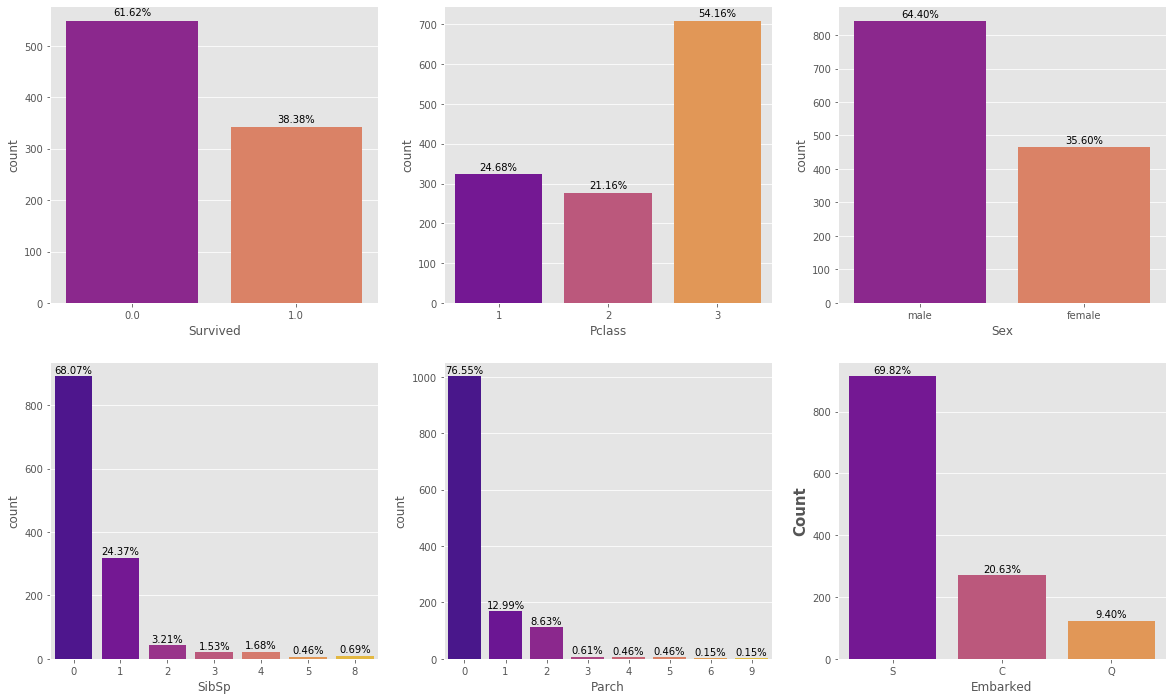

In [21]:
plotFrequency(cats)

In [25]:
def plotSurvival(cats, data) :
    #Plotting the categorical plot with hue as Survival
    fig, axes = plt.subplots(math.ceil(len(cats) / 3), 3, figsize = (20,12))
    axes = axes.flatten()
    
    for ax, cat in zip(axes, cats) :
        
        if cat == 'Survived' :
            sns.countplot(data[cat], palette= 'plasma', ax = ax)
            
        else:
            sns.countplot(data[cat], hue = data['Survived'], palette= 'plasma',ax =ax)
            
            ax.legend(title = 'Survived', loc = 'upper right', labels = ['No', 'Yes'])
        
        plt.ylabel('Count', fontsize = 15, weight = 'bold')
    

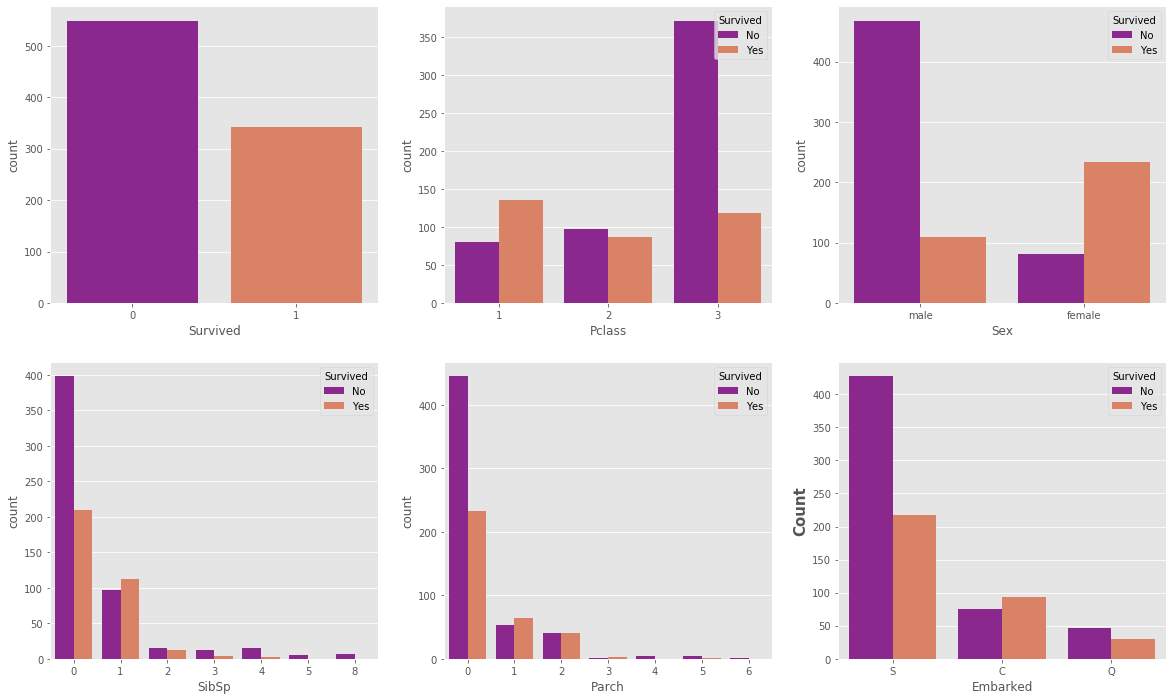

In [26]:
plotSurvival(cats, train_data)

In [29]:
def plot_3chart(df, feature) :
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    
    #Creating a customized chart and giving in figsize and everything
    fig = plt.figure(constrained_layout = True, figsize = (12,8))
    #Creating a grid of 3 cols and 3 rows
    grid = gridspec.GridSpec(ncols= 3, nrows=3, figure= fig)
    
    #Customizing the histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    #Set the title
    ax1.set_title('Histogram')
    #Plot the histogram
    sns.distplot(df.loc[:, feature], hist = True, kde = True, fit=norm, ax = ax1, color = '#e74c3c')
    ax1.legend(labels = ['Normal', 'Actual'])
    
    #Customizing the QQ plot
    ax2 = fig.add_subplot(grid[1, :2])
    #Set the title
    ax2.set_title('Probability Plot')
    #Plotting the QQ plot
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])), plot= ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)
    
    #Customizing the box plot
    ax3 = fig.add_subplot(grid[:, 2])
    #Set the title
    ax3.set_title('Box Plot')
    #Plotting the box plot
    sns.boxplot(df.loc[:, feature], orient= 'v', ax= ax3, color = '#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))
    plt.suptitle(f'{feature}', fontsize=24)

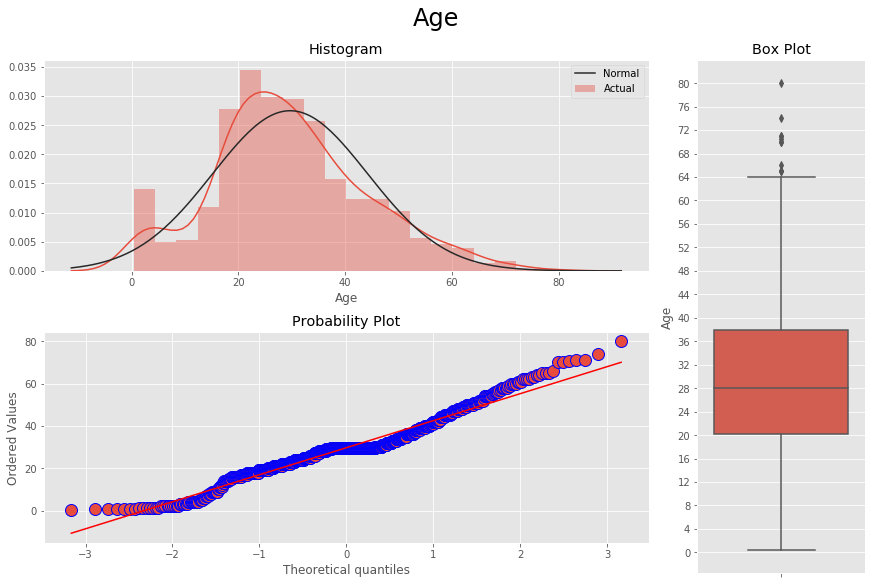

In [30]:
plot_3chart(train_data, 'Age')

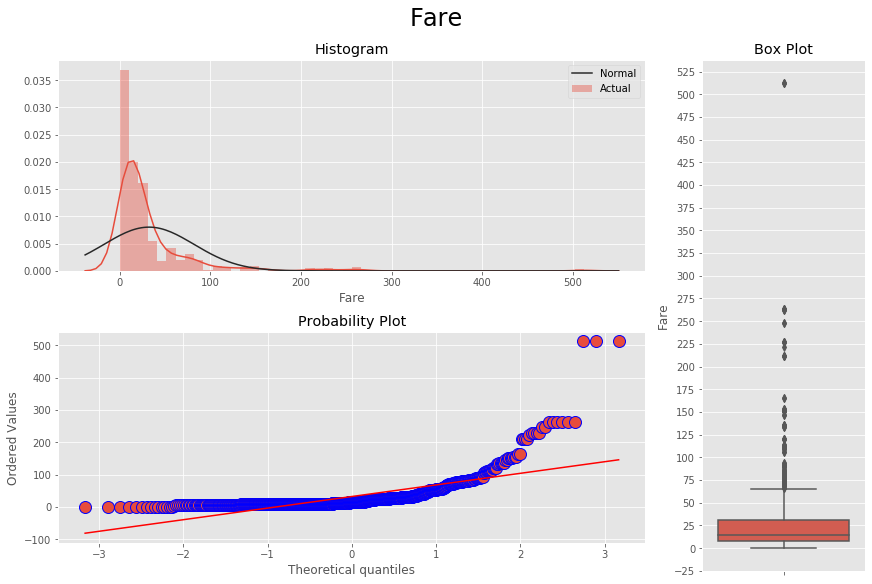

In [31]:
plot_3chart(train_data, 'Fare')

In [33]:
#Listing most correlated continous variable
train_corr = train_data[['Survived', 'Age', 'Fare']].corr(method = 'spearman').abs().unstack().sort_values()
train_corr

Survived  Age         0.052565
Age       Survived    0.052565
          Fare        0.135051
Fare      Age         0.135051
Survived  Fare        0.323736
Fare      Survived    0.323736
Survived  Survived    1.000000
Age       Age         1.000000
Fare      Fare        1.000000
dtype: float64